In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from publish import *

# MEAT DATA

In [2]:
meat_production = pd.read_csv("Meat_Stats_Meat_Production.csv")
slaughter_counts = pd.read_csv("Meat_Stats_Slaughter_Counts.csv")
slaughter_weights = pd.read_csv("Meat_Stats_Slaughter_Weights.csv")
cold_storage = pd.read_csv("Meat_Stats_Cold_Storage.csv")

#### Red Meats: Beef, Veal, Pork and Lamb & Mutton
#### Poultry: Broilers, Other Chicken, Turkey


## -  Meat Production

In [3]:
meat_production

Date  Year  Month            Unit Production  Animal  \
0      Dec-2023  2023     12  Million Pounds   2,189.80    Beef   
1      Nov-2023  2023     11  Million Pounds   2,280.90    Beef   
2      Oct-2023  2023     10  Million Pounds   2,340.90    Beef   
3      Sep-2023  2023      9  Million Pounds   2,149.40    Beef   
4      Aug-2023  2023      8  Million Pounds   2,363.50    Beef   
...         ...   ...    ...             ...        ...     ...   
13590  May-1921  1921      5  Million Pounds        NaN  Turkey   
13591  Apr-1921  1921      4  Million Pounds        NaN  Turkey   
13592  Mar-1921  1921      3  Million Pounds        NaN  Turkey   
13593  Feb-1921  1921      2  Million Pounds        NaN  Turkey   
13594  Jan-1921  1921      1  Million Pounds        NaN  Turkey   

      Commercial or Federally Inspected Type of Meat  
0                            Commercial     Red Meat  
1                            Commercial     Red Meat  
2                            Commercial     Red Meat  
3                            Commercial     Red Meat  
4                            Commercial     Red Meat  
...                                 ...          ...  
13590               Federally Inspected      Poultry  
13591               Federally Inspected      Poultry  
13592               Federally Inspected      Poultry  
13593               Federally Inspected      Poultry  
13594               Federally Inspected      Poultry  

[13595 rows x 8 columns]

In [4]:
# Convert the "Production" data from strings to floats
meat_production["Production"] = meat_production["Production"].apply(lambda x: x if type(x) == float else float(x.replace(",", "")))

meats = meat_production["Animal"].unique()
produce_type = meat_production["Commercial or Federally Inspected"].unique()

print(meats)
print(produce_type)

['Beef' 'Veal' 'Pork' 'Lamb and Mutton' 'Broilers' 'Other Chicken'
 'Turkey']
['Commercial' 'Federally Inspected']


In [5]:
for unit in meat_production["Unit"].values:
    if unit != "Million Pounds":
        print("INCONSISTENT UNITS")

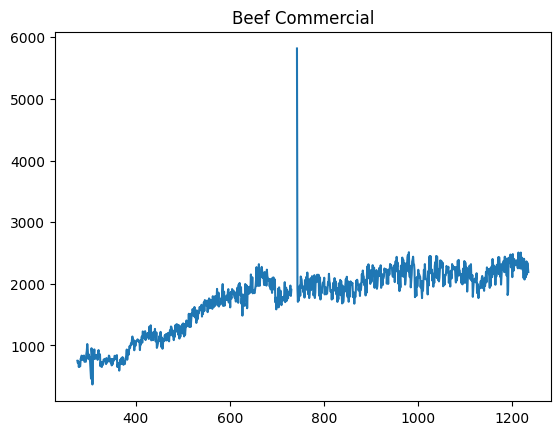

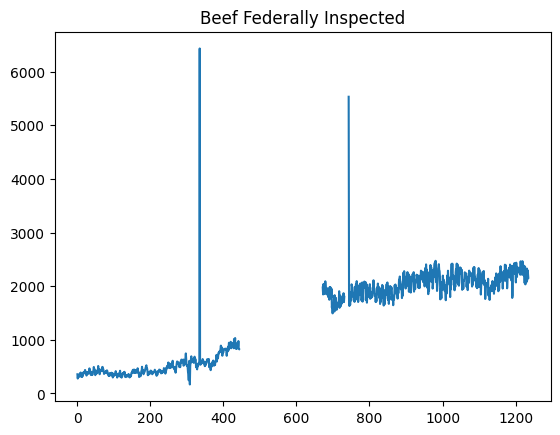

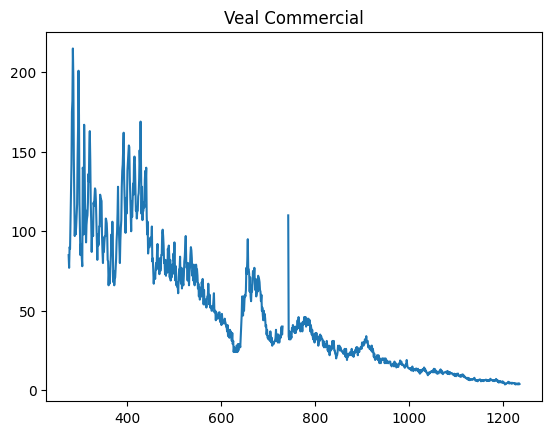

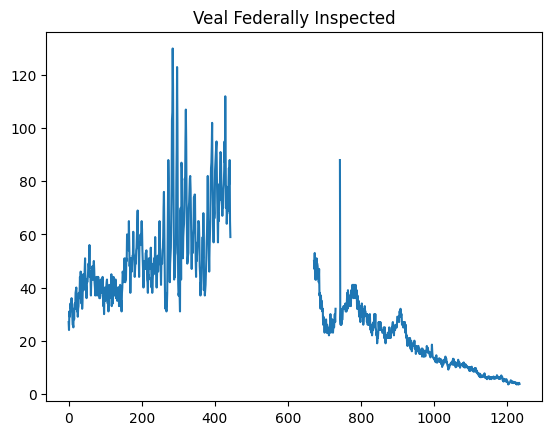

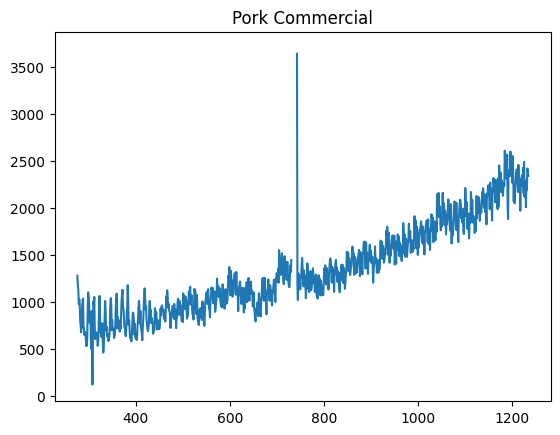

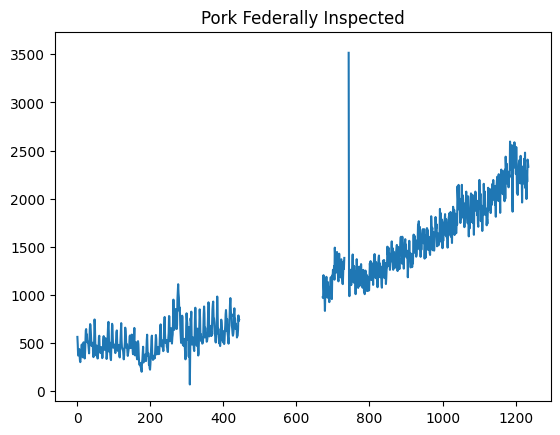

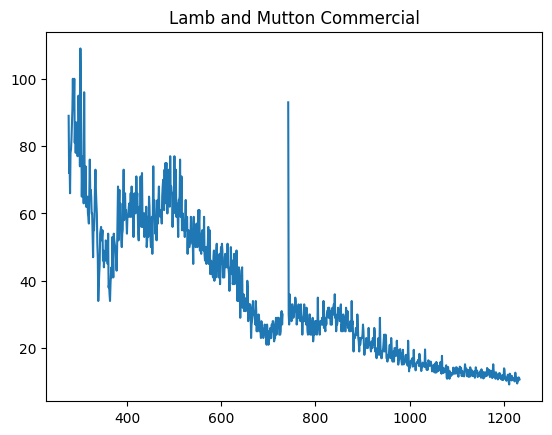

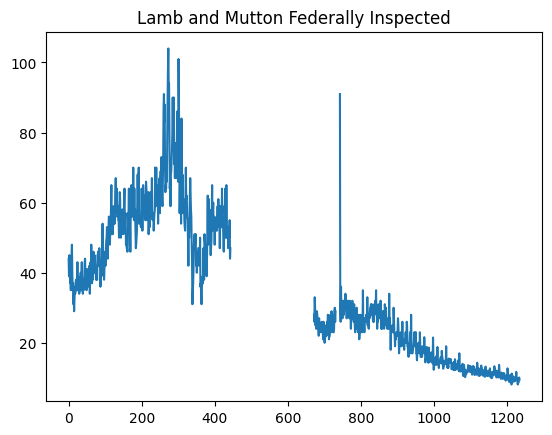

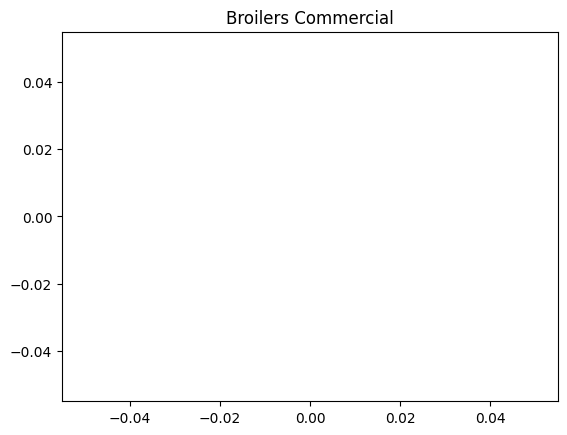

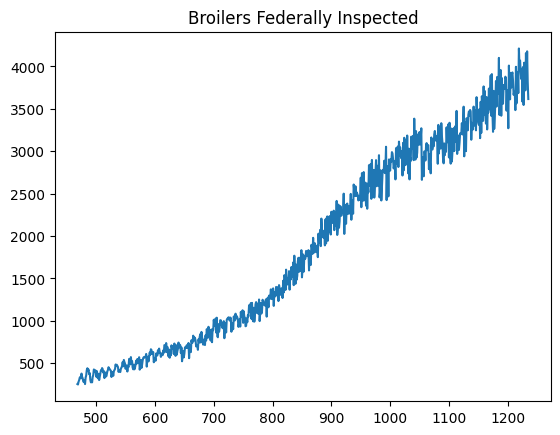

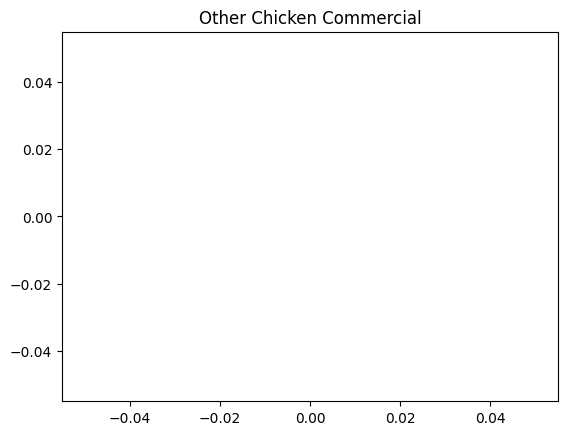

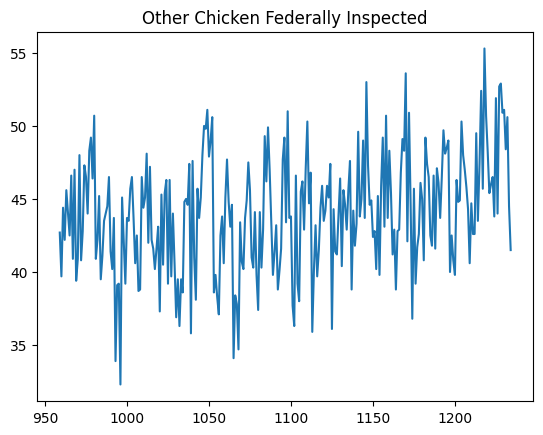

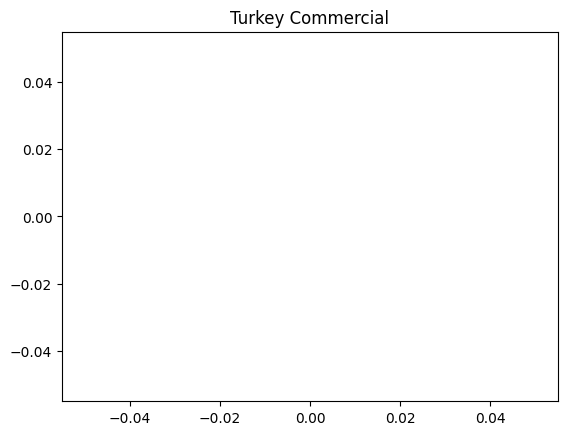

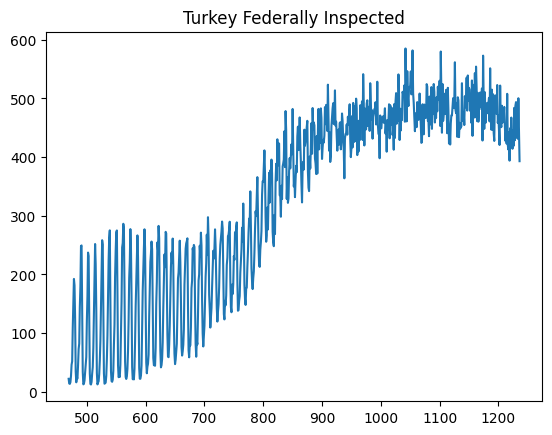

In [6]:
production_dfs = {}

for meat in meats:
    for prod in produce_type:
        production_dfs[meat + " " + prod] = meat_production[(meat_production["Animal"] == meat) & (meat_production["Commercial or Federally Inspected"] == prod)].reset_index().drop(["index"], axis=1)

for p in production_dfs:
    plt.plot(range(len(production_dfs[p])), np.flip(production_dfs[p]["Production"].values))
    plt.title(p)
    plt.show()

In [7]:
# Cleaning the data
del production_dfs["Turkey Commercial"]
del production_dfs["Other Chicken Commercial"]
del production_dfs["Broilers Commercial"]

In [8]:
# Notice that certain data is in quarters, there will be a spike in production followed by two NA rows. I will replace this with three rows each equal to the spiked value
# divided by three
for dfName in production_dfs:
    for i in range(1, len(production_dfs[dfName]) - 2):
        if production_dfs[dfName].at[i, "Production"] > 2 * production_dfs[dfName].at[i - 1, "Production"]:
            if pd.isnull(production_dfs[dfName].at[i + 1, "Production"]) and pd.isnull(production_dfs[dfName].at[i + 2, "Production"]):
                production_dfs[dfName].at[i + 2, "Production"] = production_dfs[dfName].at[i, "Production"] / 3
                production_dfs[dfName].at[i + 1, "Production"] = production_dfs[dfName].at[i, "Production"] / 3
                production_dfs[dfName].at[i, "Production"] /=3

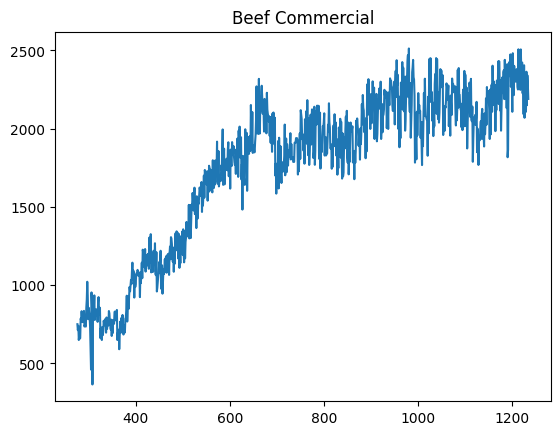

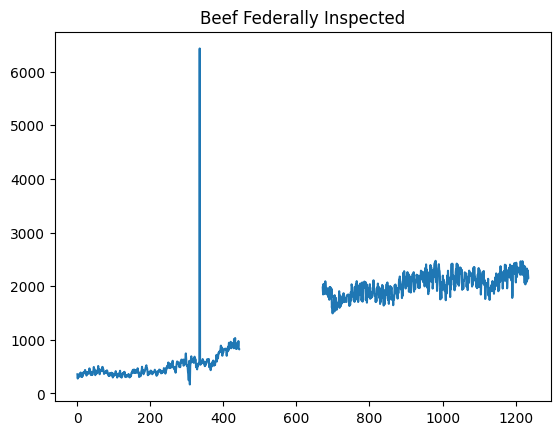

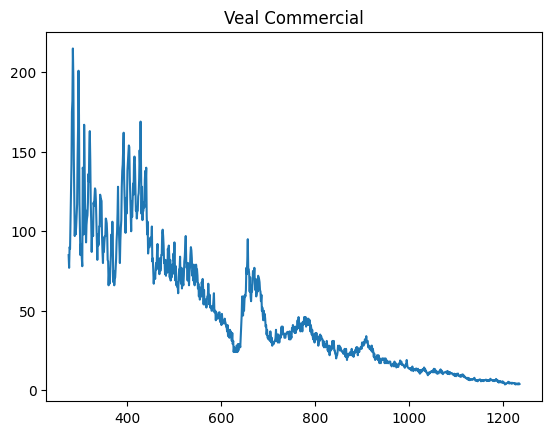

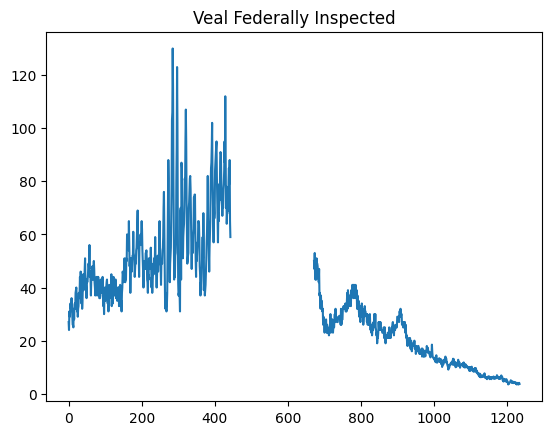

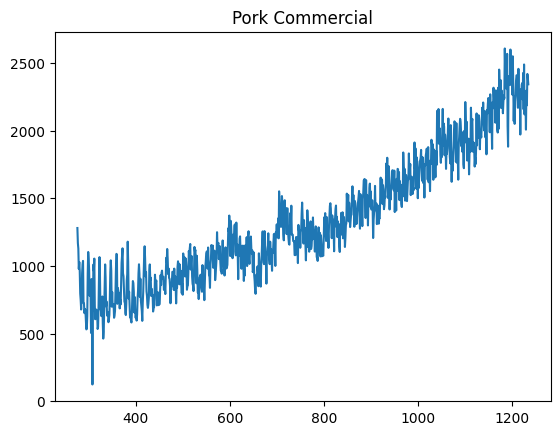

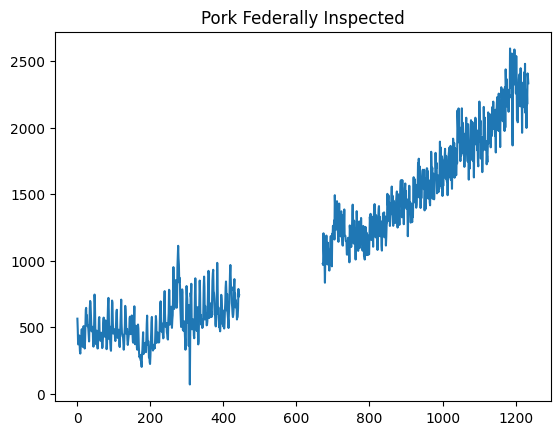

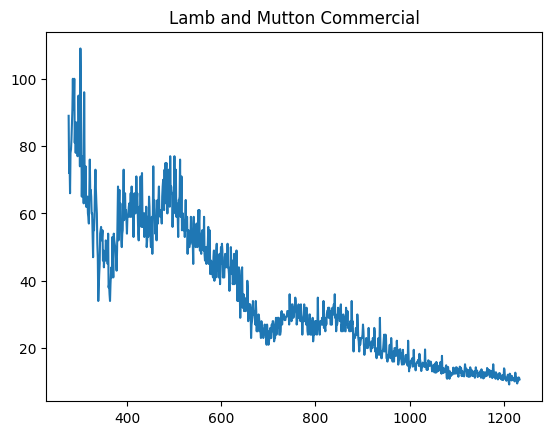

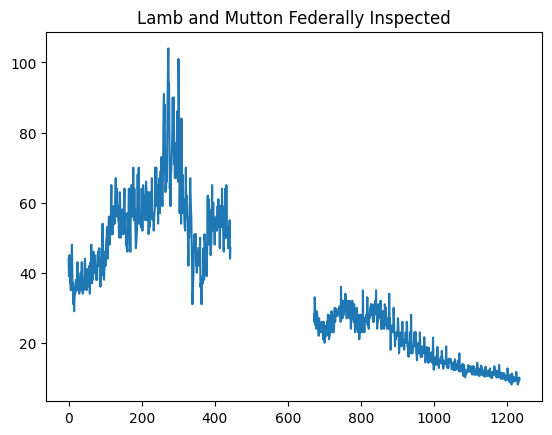

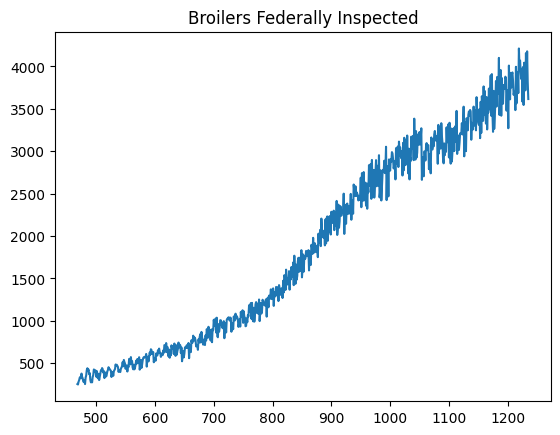

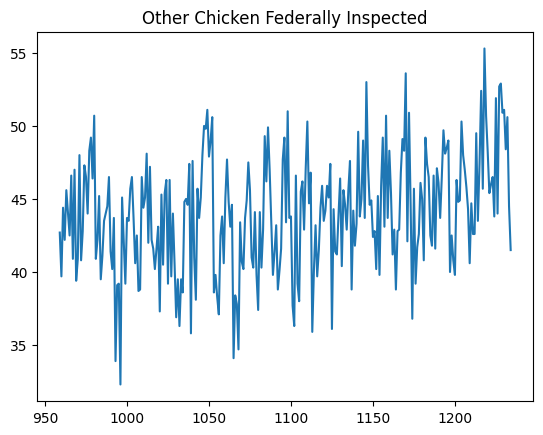

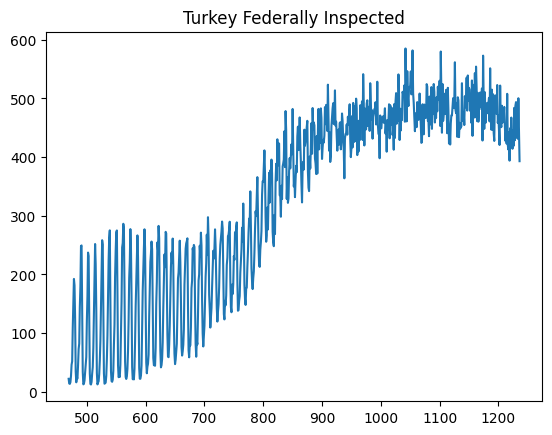

In [9]:
# Plotting the cleaned up graphs
for p in production_dfs:
    plt.plot(range(len(production_dfs[p])), np.flip(production_dfs[p]["Production"].values))
    plt.title(p)
    plt.show()

## -  Slaughter Count

In [10]:
slaughter_counts

Date  Year  Month        Unit   Animal      Count  \
0      Dec-2023  2023     12  1,000 Head   Cattle   2,593.40   
1      Nov-2023  2023     11  1,000 Head   Cattle   2,729.90   
2      Oct-2023  2023     10  1,000 Head   Cattle   2,826.00   
3      Sep-2023  2023      9  1,000 Head   Cattle   2,610.60   
4      Aug-2023  2023      8  1,000 Head   Cattle   2,890.00   
...         ...   ...    ...         ...      ...        ...   
15278  Apr-1983  1983      4  1,000 Head  Turkeys  10,563.00   
15279  Mar-1983  1983      3  1,000 Head  Turkeys  11,979.00   
15280  Feb-1983  1983      2  1,000 Head  Turkeys   8,477.00   
15281  Jan-1983  1983      1  1,000 Head  Turkeys   8,532.00   
15282  Dec-1982  1982     12  1,000 Head  Turkeys  11,725.00   

      Commercial_Or_Federally_Inspected Type_Of_Meat  
0                            Commercial     Red Meat  
1                            Commercial     Red Meat  
2                            Commercial     Red Meat  
3                            Commercial     Red Meat  
4                            Commercial     Red Meat  
...                                 ...          ...  
15278               Federally Inspected      Poultry  
15279               Federally Inspected      Poultry  
15280               Federally Inspected      Poultry  
15281               Federally Inspected      Poultry  
15282               Federally Inspected      Poultry  

[15283 rows x 8 columns]

In [11]:
# Convert the "Count" data from strings to floats
slaughter_counts["Count"] = slaughter_counts["Count"].apply(lambda x: x if type(x) == float else float(x.replace(",", "")))

animals = slaughter_counts["Animal"].unique()
produce_type = slaughter_counts["Commercial_Or_Federally_Inspected"].unique()

print(animals)
print(produce_type)

['Cattle' 'Steers' 'Heifers' 'Beef Cows' 'Dairy Cows' 'Bulls and Stags'
 'Calves' 'Hogs' 'Barrows and Gilts' 'Sows' 'Boars and Stags'
 'Sheep and Lambs' 'Lambs and Yearlings' 'Mature Sheep' 'Broilers'
 'Other chickens' 'Turkeys']
['Commercial' 'Federally Inspected']


In [12]:
for unit in slaughter_counts["Unit"]:
    if unit != "1,000 Head":
        print("INCONSISTENT UNITS")

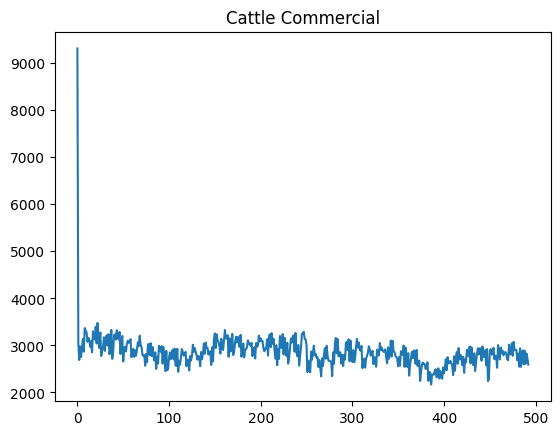

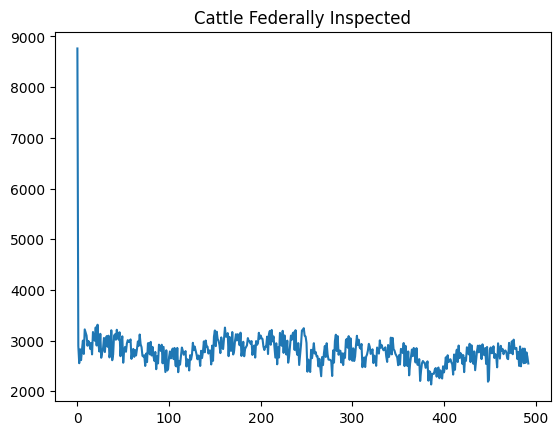

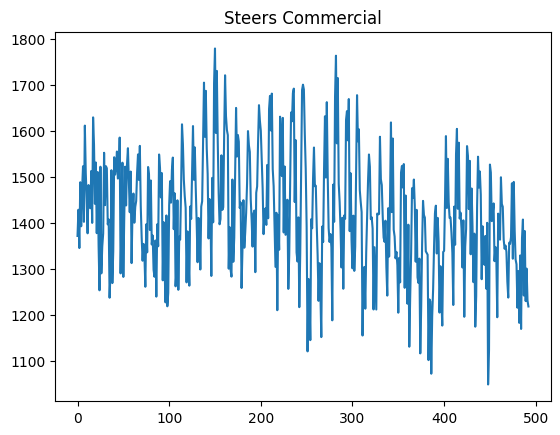

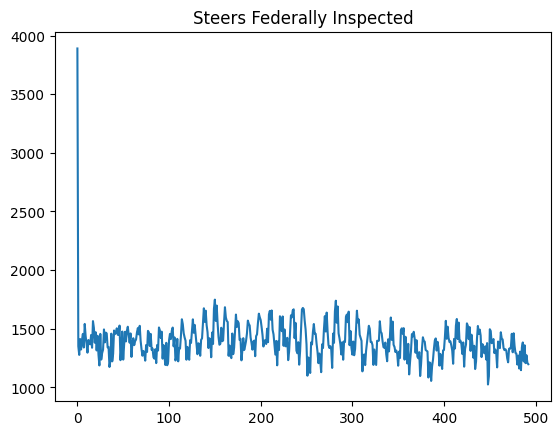

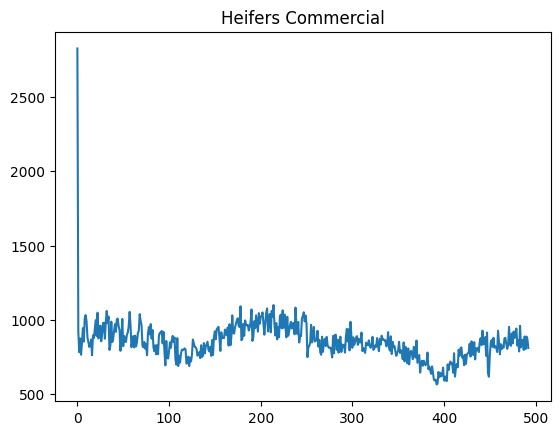

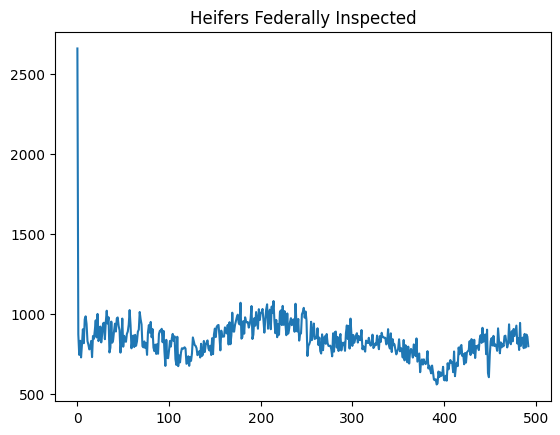

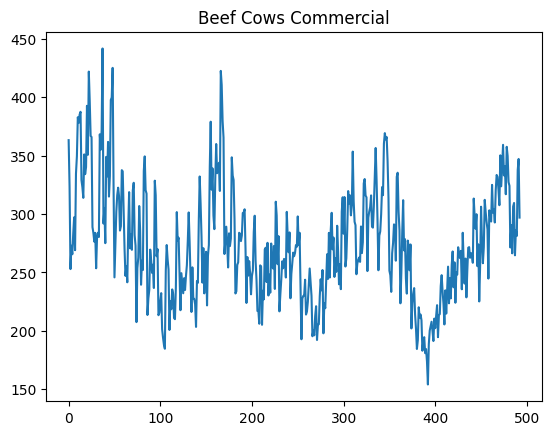

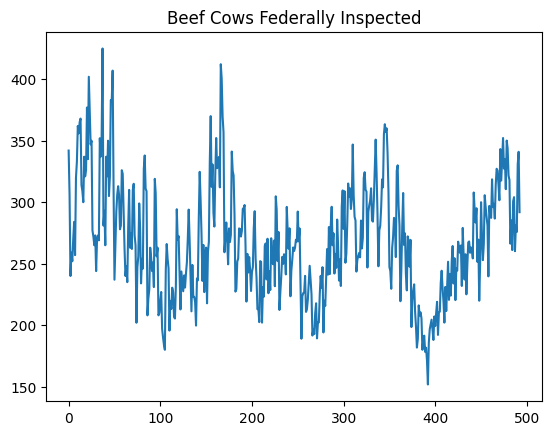

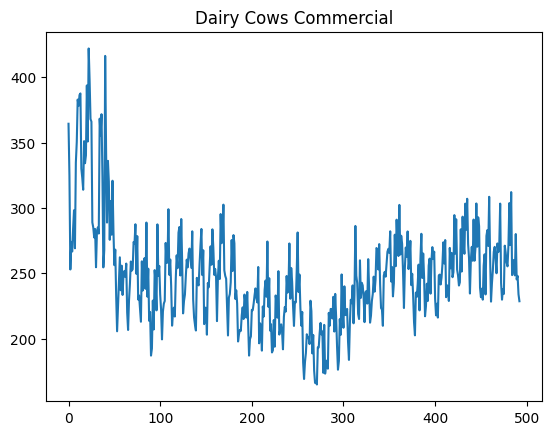

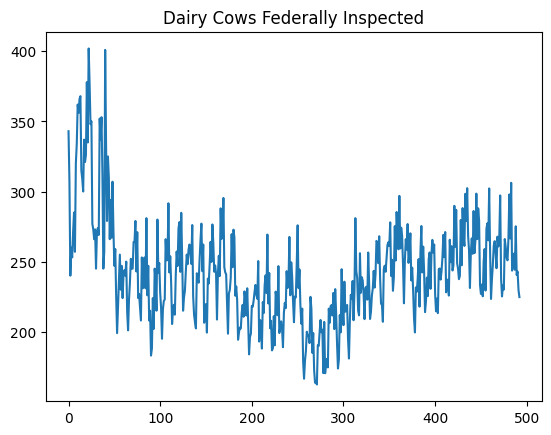

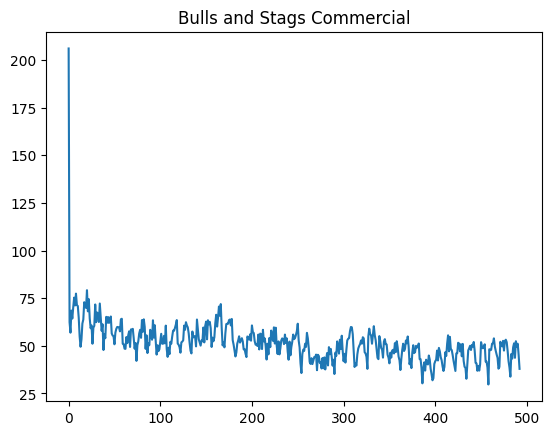

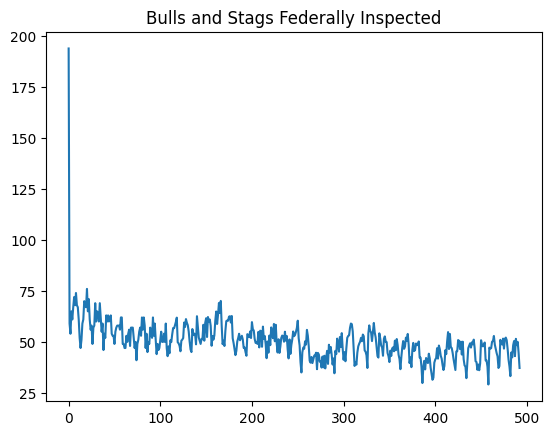

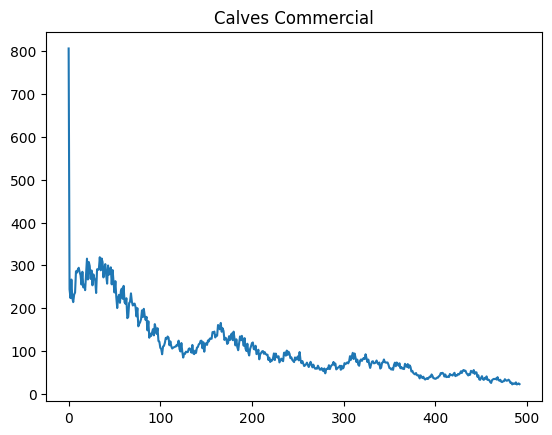

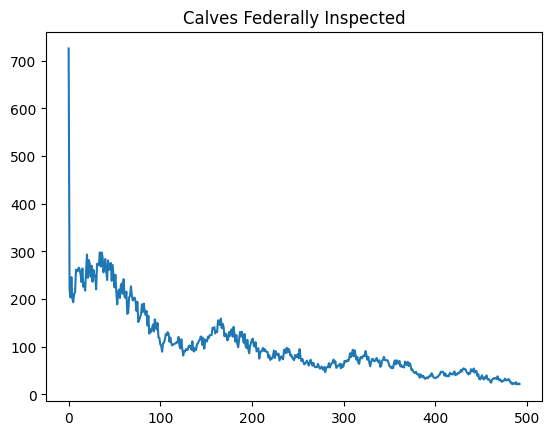

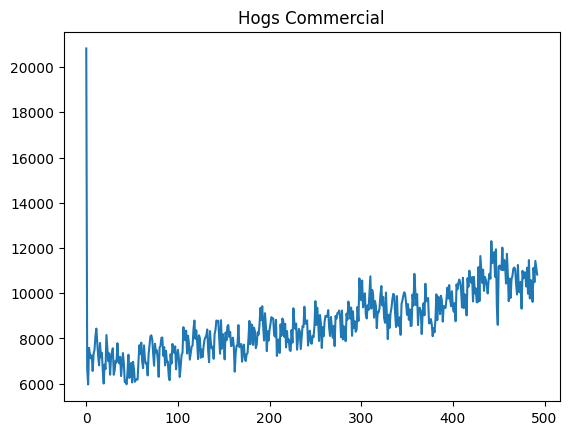

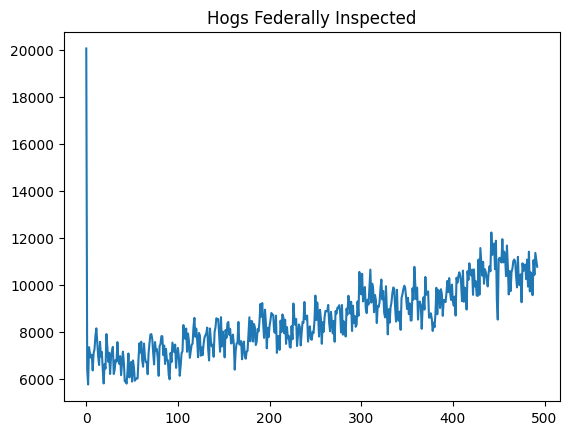

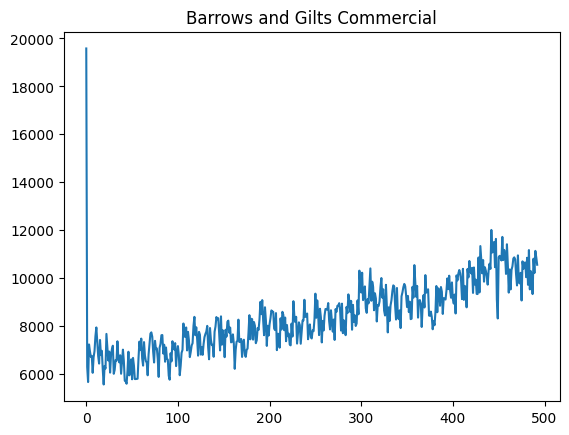

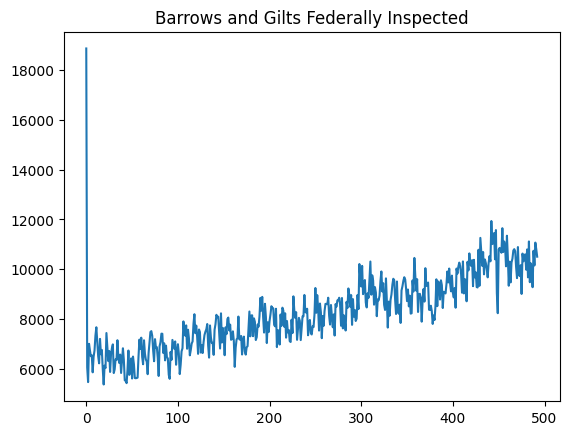

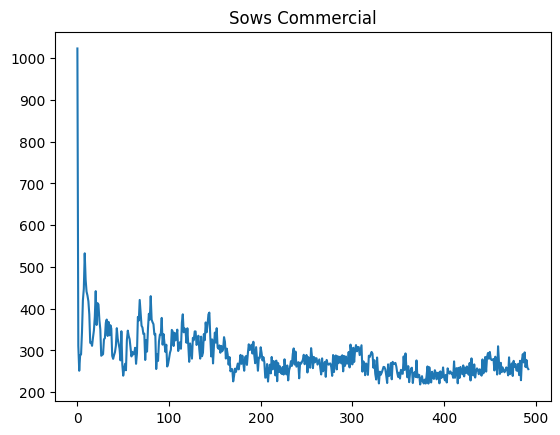

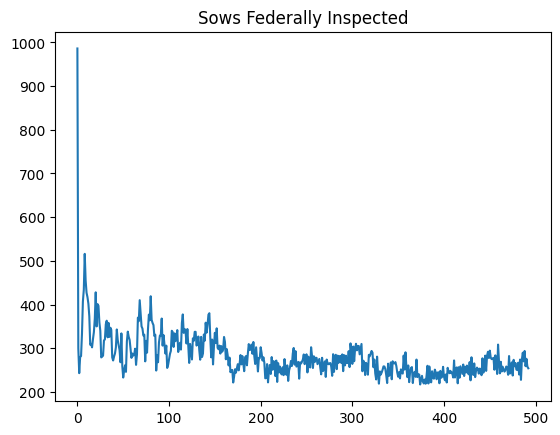

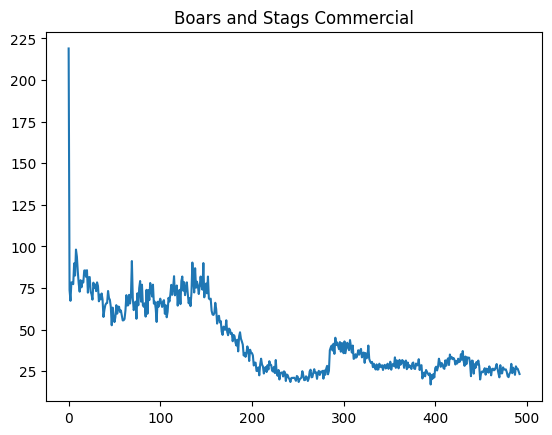

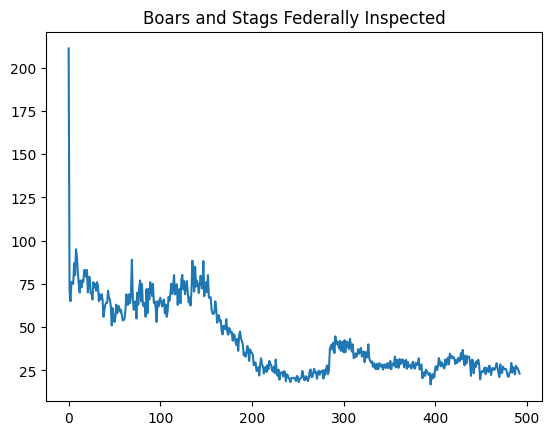

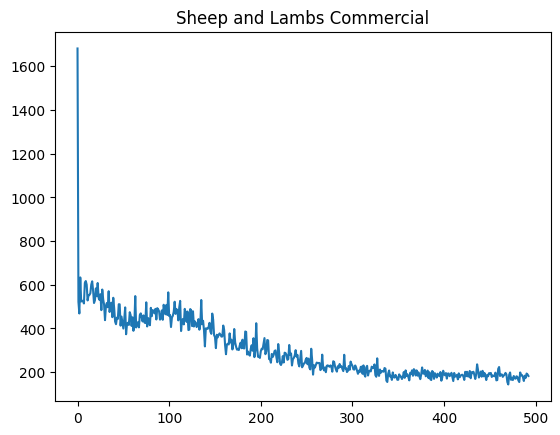

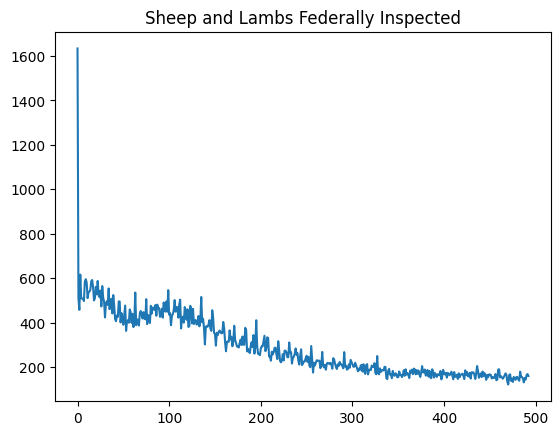

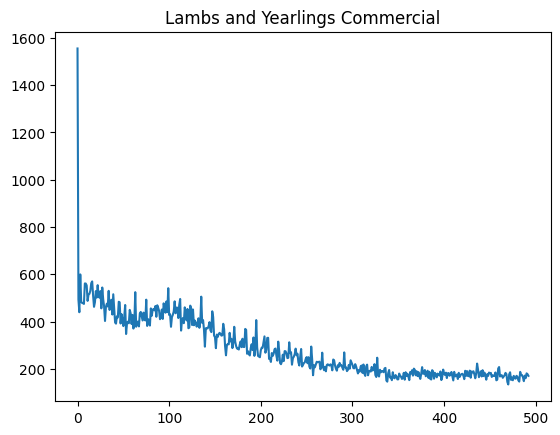

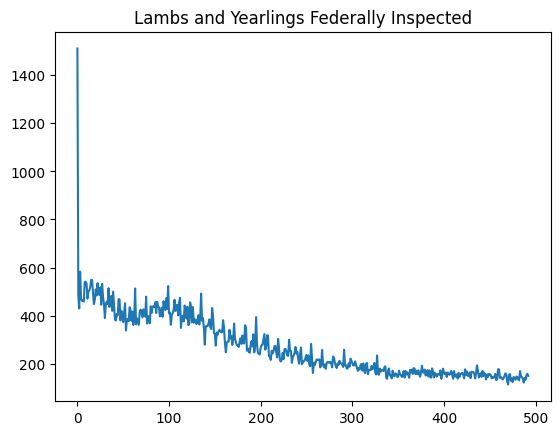

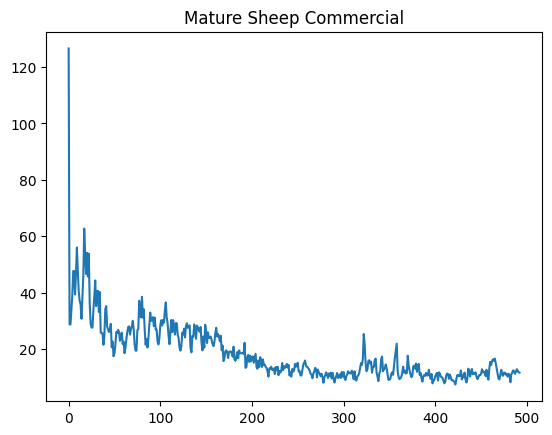

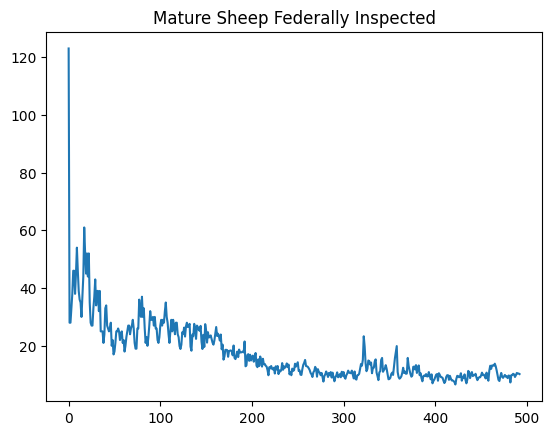

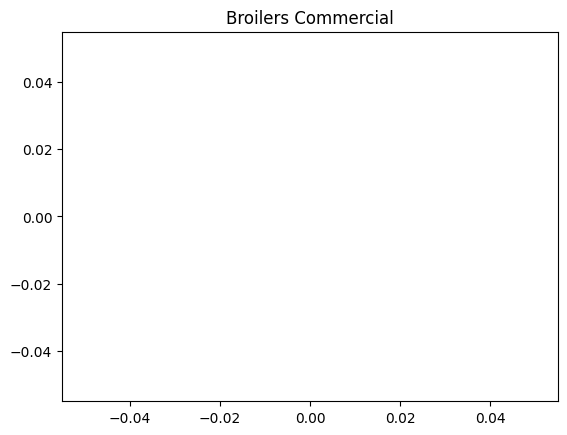

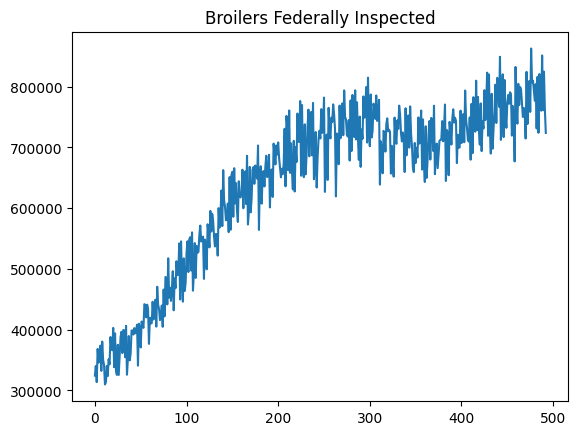

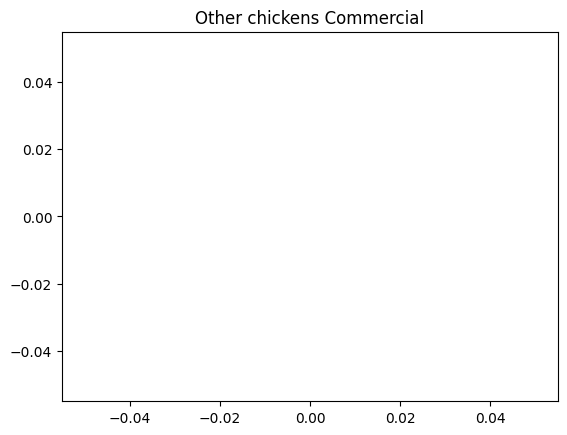

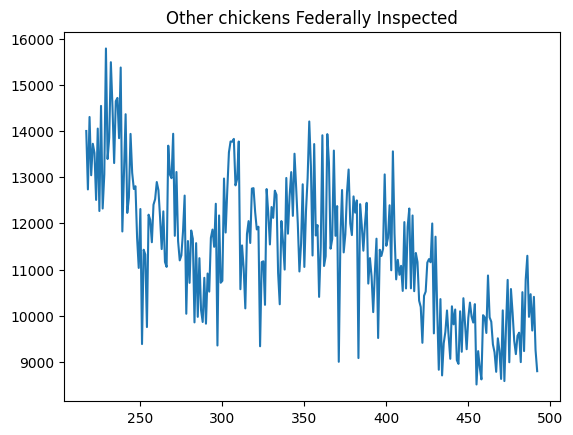

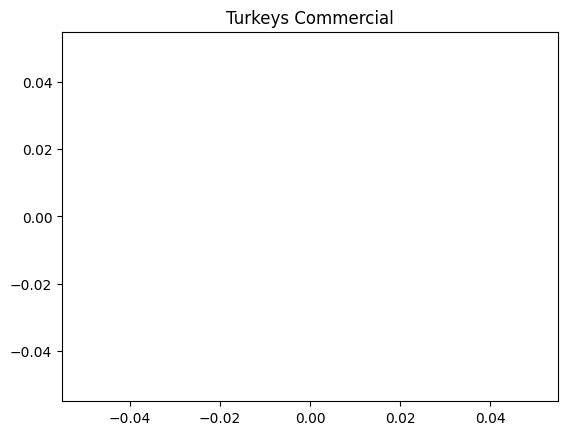

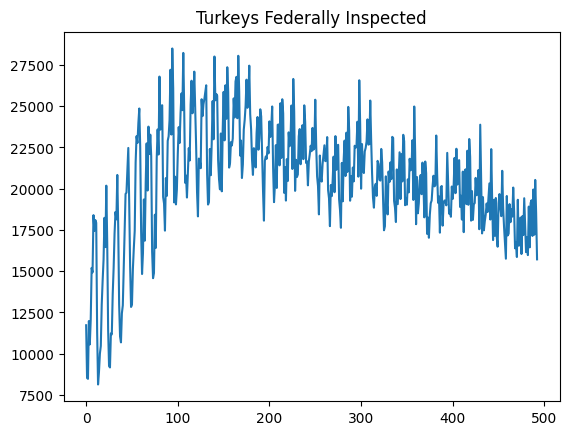

In [13]:
counts_dfs = {}

for animal in animals:
    for prod in produce_type:
        counts_dfs[animal + " " + prod] = slaughter_counts[(slaughter_counts["Animal"] == animal) & (slaughter_counts["Commercial_Or_Federally_Inspected"] == prod)].reset_index().drop(["index"], axis=1)

# Plotting the cleaned up graphs
for c in counts_dfs:
    plt.plot(range(len(counts_dfs[c])), np.flip(counts_dfs[c]["Count"].values))
    plt.title(c)
    plt.show()

In [14]:
del counts_dfs["Turkeys Commercial"]
del counts_dfs["Other chickens Commercial"]
del counts_dfs["Broilers Commercial"]

In [15]:
for c in counts_dfs:
    if len(counts_dfs[c]) != 493:
        print("INCONSISTENT LENGTHS")

#### Data from Dec 1982 to Dec 2023

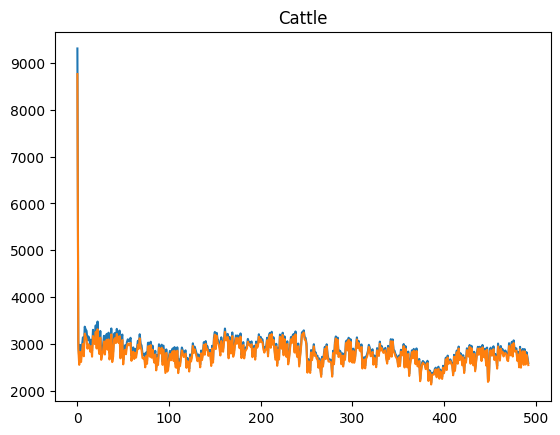

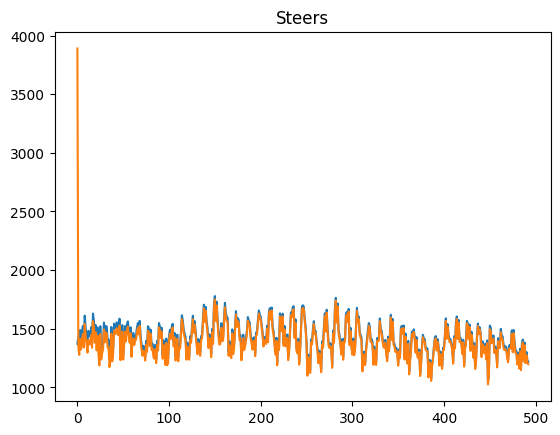

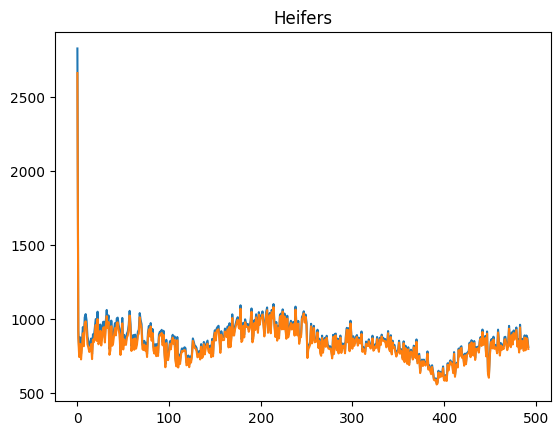

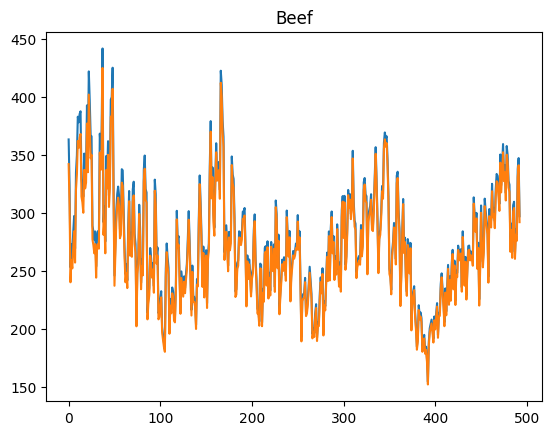

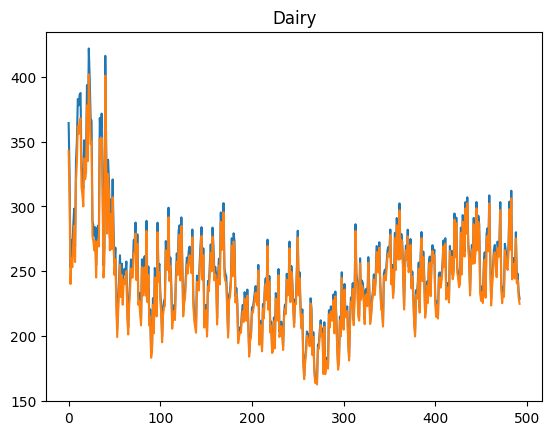

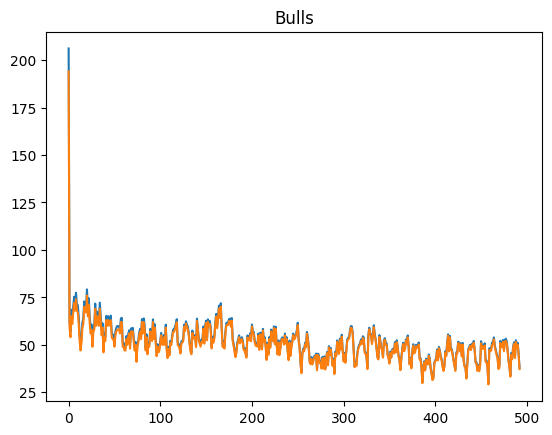

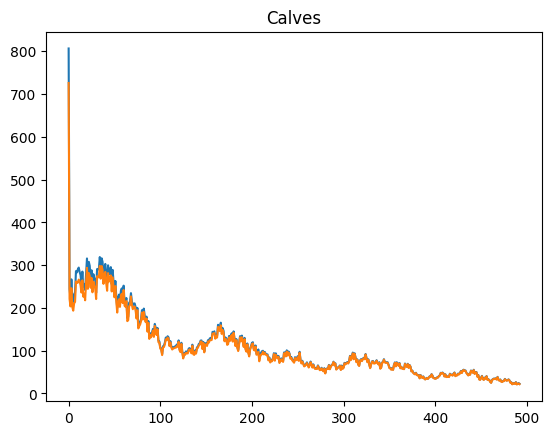

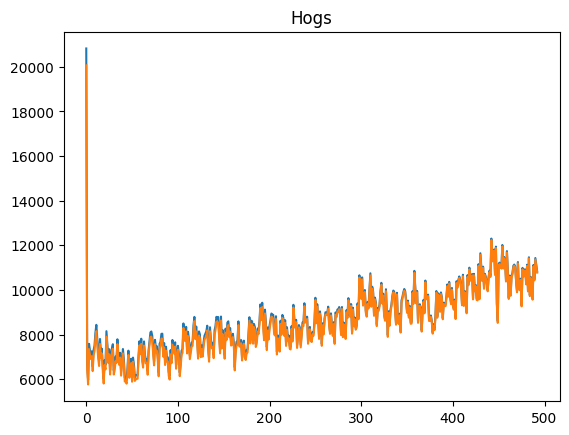

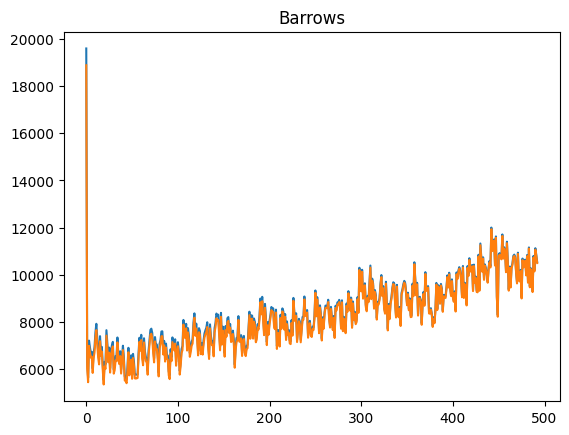

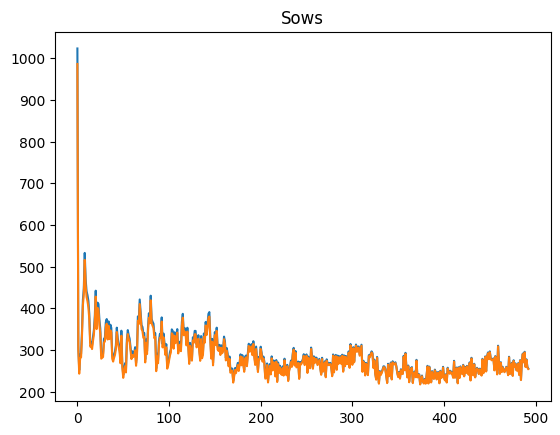

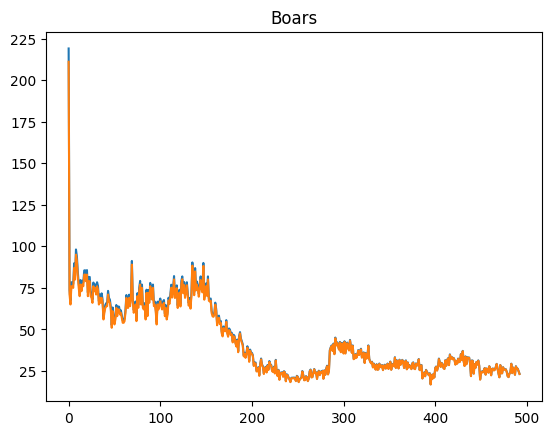

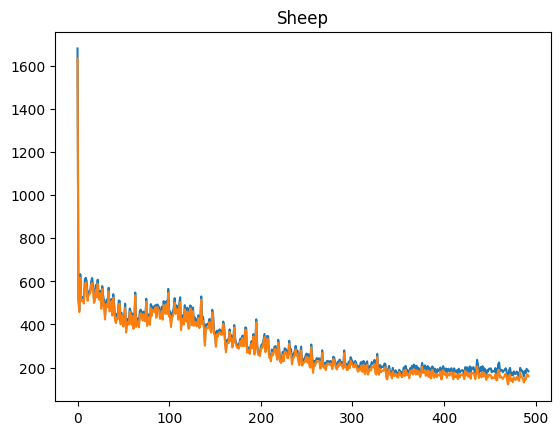

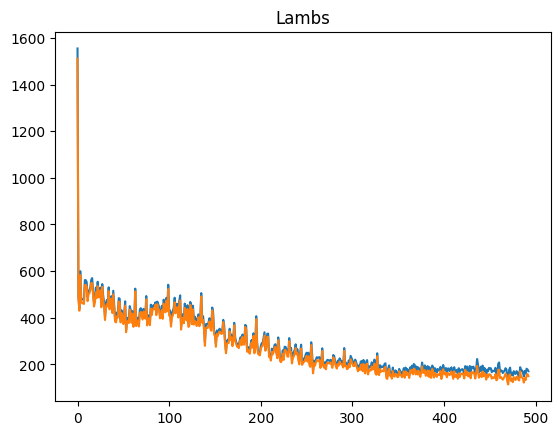

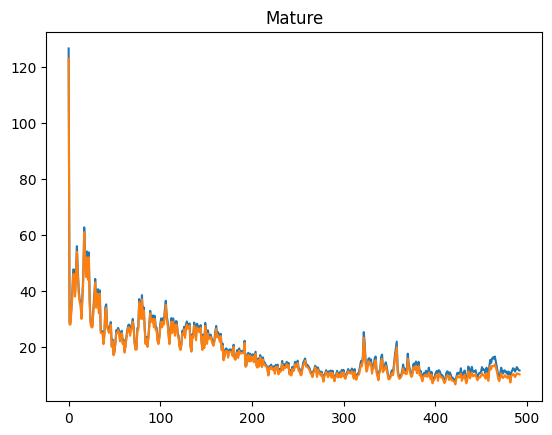

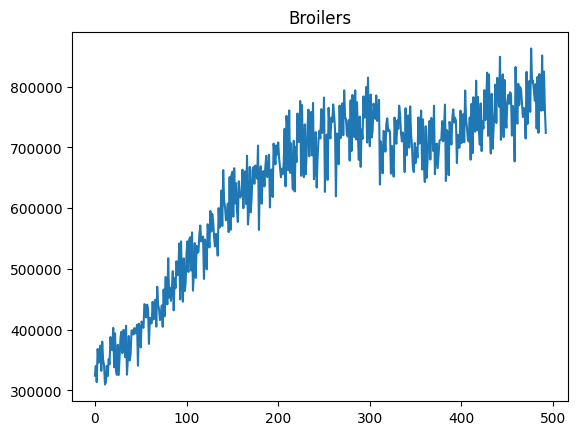

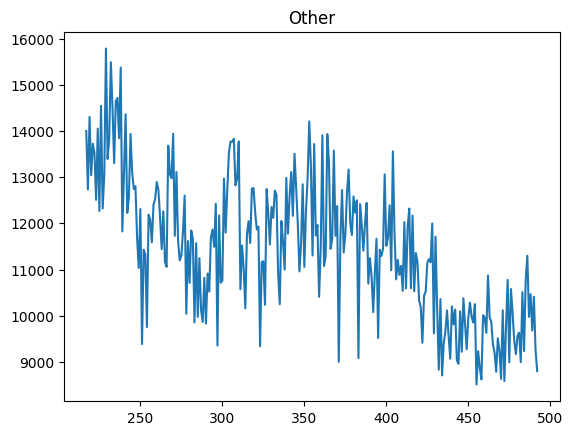

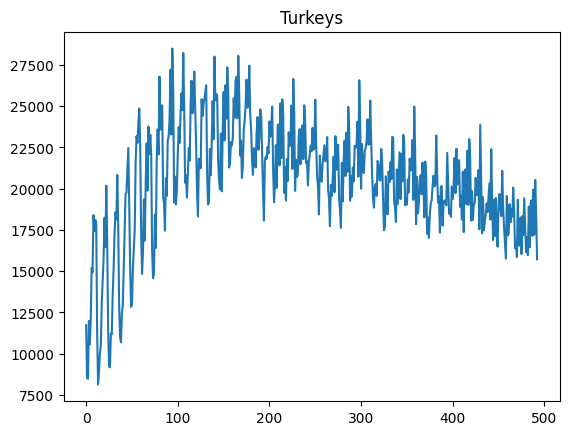

In [16]:
# Plotting Federal and Commercial counts, they are highly correlated (in fact, dairy and beef cows are also highly correlated)

cur_animal = None

for c in counts_dfs:
    if not cur_animal:
        plt.plot(range(len(counts_dfs[c])), np.flip(counts_dfs[c]["Count"].values))
        cur_animal = c.split()[0]
    elif c.split()[0] == cur_animal:
        plt.plot(range(len(counts_dfs[c])), np.flip(counts_dfs[c]["Count"].values))
        plt.title(cur_animal)
        plt.show()
        cur_animal = None
    else:
        plt.title(cur_animal)
        plt.show()
        plt.plot(range(len(counts_dfs[c])), np.flip(counts_dfs[c]["Count"].values))
        cur_animal = c.split()[0]
plt.title(cur_animal)
plt.show()

## -  Slaughter Weights

In [17]:
slaughter_weights

Date  Year  Month                      Unit           Animal  \
0     Dec-2023  2023     12  Average Weight in Pounds           Cattle   
1     Nov-2023  2023     11  Average Weight in Pounds           Cattle   
2     Oct-2023  2023     10  Average Weight in Pounds           Cattle   
3     Sep-2023  2023      9  Average Weight in Pounds           Cattle   
4     Aug-2023  2023      8  Average Weight in Pounds           Cattle   
...        ...   ...    ...                       ...              ...   
9343  May-1983  1983      5  Average Weight in Pounds  Sheep and Lambs   
9344  Apr-1983  1983      4  Average Weight in Pounds  Sheep and Lambs   
9345  Mar-1983  1983      3  Average Weight in Pounds  Sheep and Lambs   
9346  Feb-1983  1983      2  Average Weight in Pounds  Sheep and Lambs   
9347  Jan-1983  1983      1  Average Weight in Pounds  Sheep and Lambs   

        Weight Commercial_Or_Federally_Inspected Live_Or_Dressed Type_Of_Meat  
0     1,401.00                        Commercial            Live     Red Meat  
1     1,387.00                        Commercial            Live     Red Meat  
2     1,374.00                        Commercial            Live     Red Meat  
3     1,362.00                        Commercial            Live     Red Meat  
4     1,350.00                        Commercial            Live     Red Meat  
...        ...                               ...             ...          ...  
9343        57               Federally Inspected         Dressed     Red Meat  
9344        58               Federally Inspected         Dressed     Red Meat  
9345        58               Federally Inspected         Dressed     Red Meat  
9346        58               Federally Inspected         Dressed     Red Meat  
9347        57               Federally Inspected         Dressed     Red Meat  

[9348 rows x 9 columns]

In [18]:
# Convert the "Weight" data from strings to floats
slaughter_weights["Weight"] = slaughter_weights["Weight"].apply(lambda x: x if type(x) == float else float(x.replace(",", "")))

animals = slaughter_weights["Animal"].unique()
produce_type = slaughter_weights["Commercial_Or_Federally_Inspected"].unique()
weight_type = slaughter_weights["Live_Or_Dressed"].unique()

print(animals)
print(produce_type)
print(weight_type)

['Cattle' 'Calves' 'Hogs' 'Sheep and Lambs' 'Broilers' 'Other Chickens'
 'Turkeys' 'Steers' 'Heifers' 'Cows' 'Bulls and Stags']
['Commercial' 'Federally Inspected']
['Live' 'Dressed']


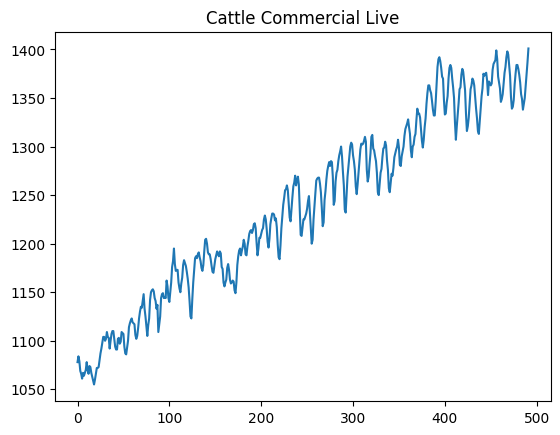

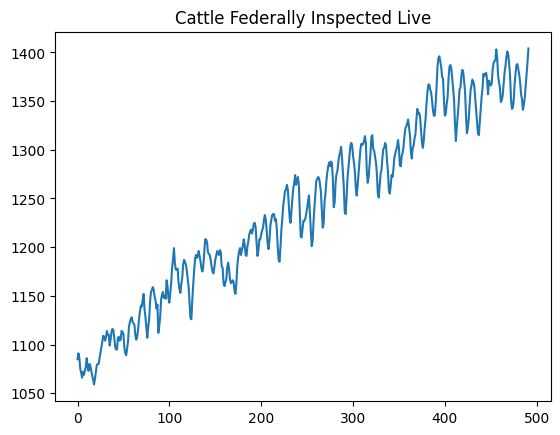

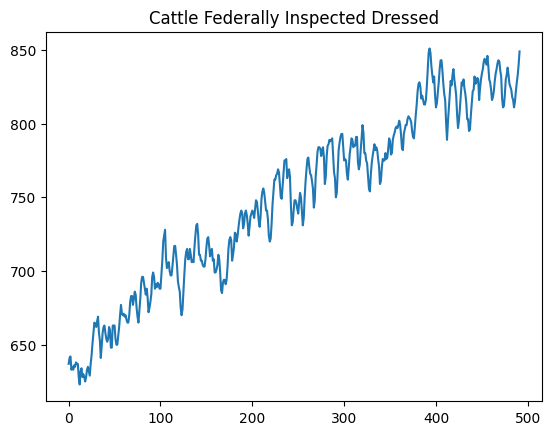

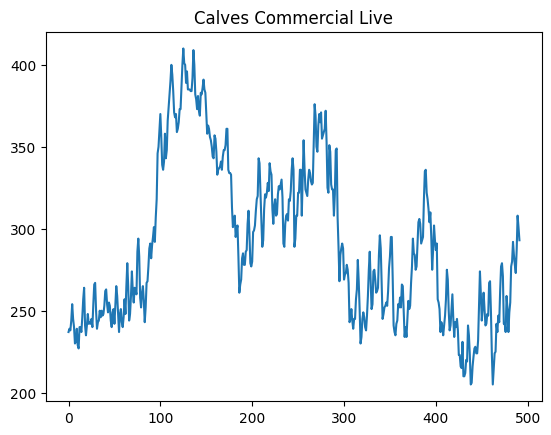

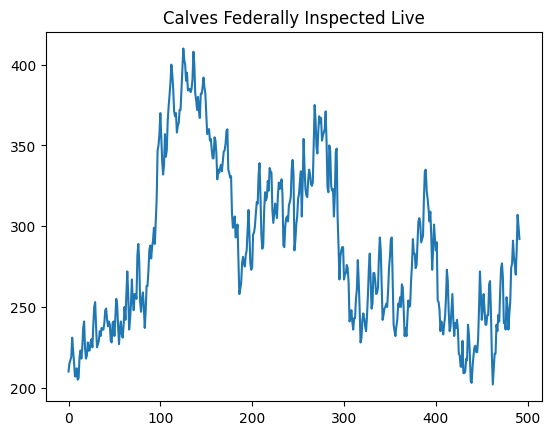

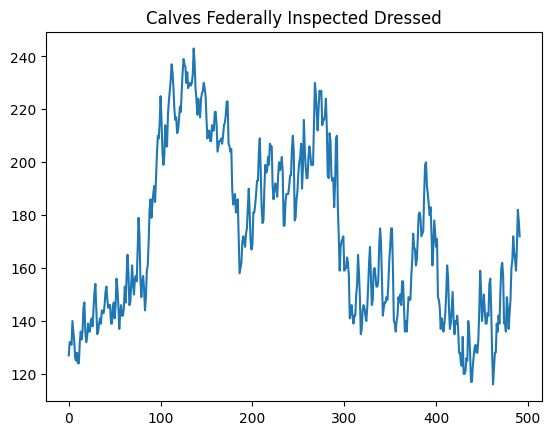

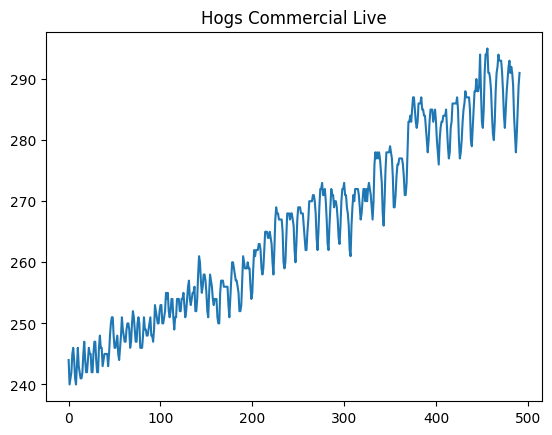

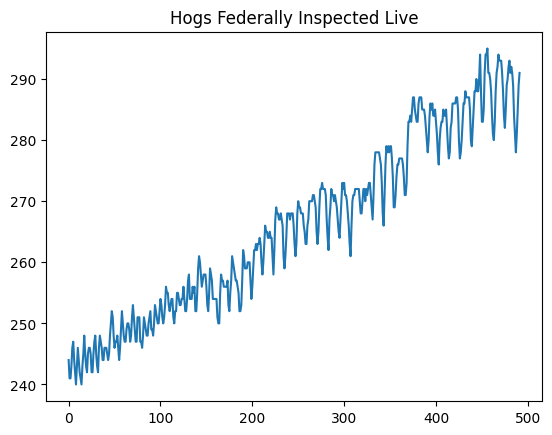

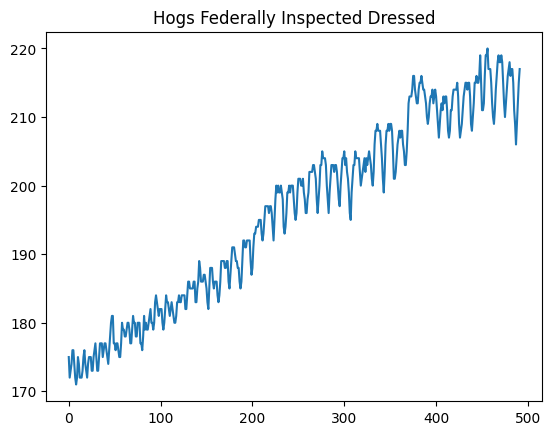

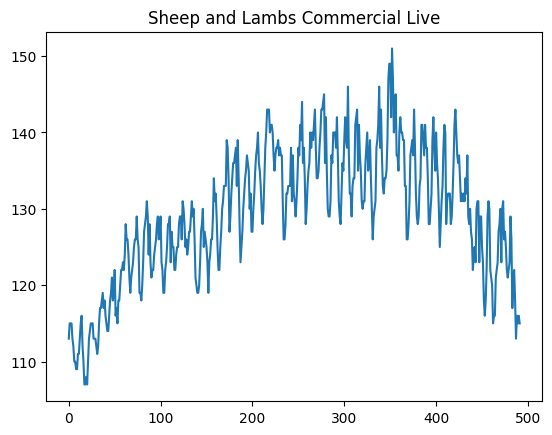

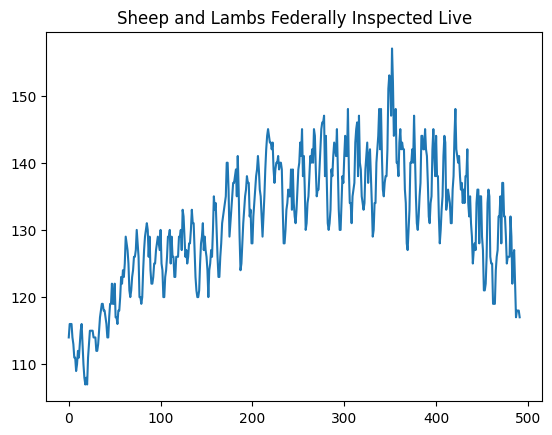

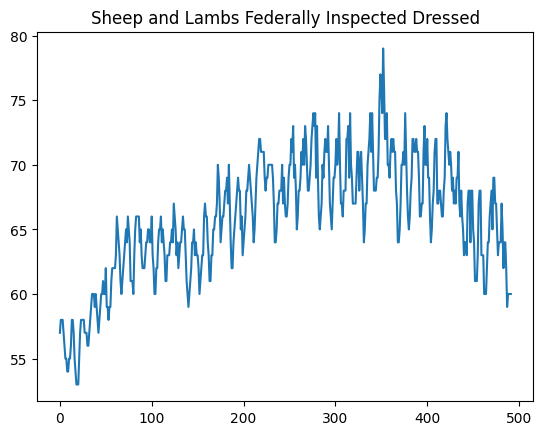

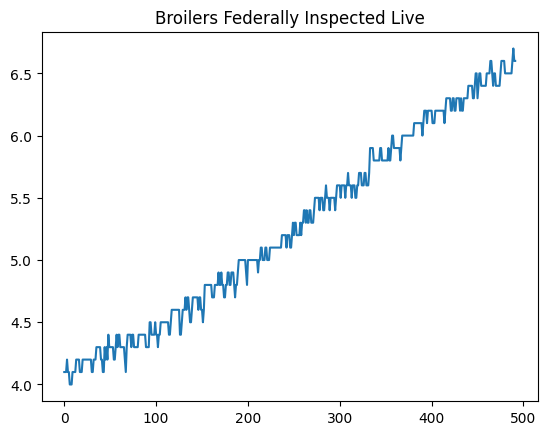

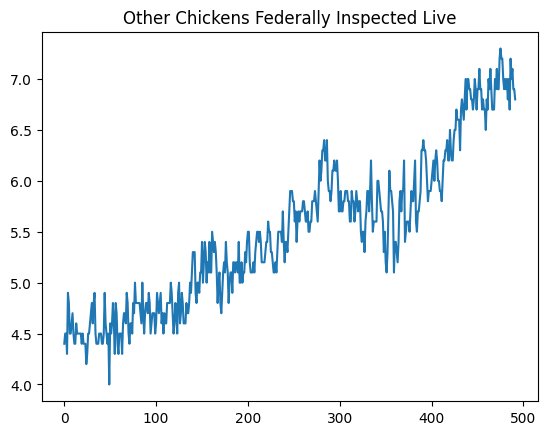

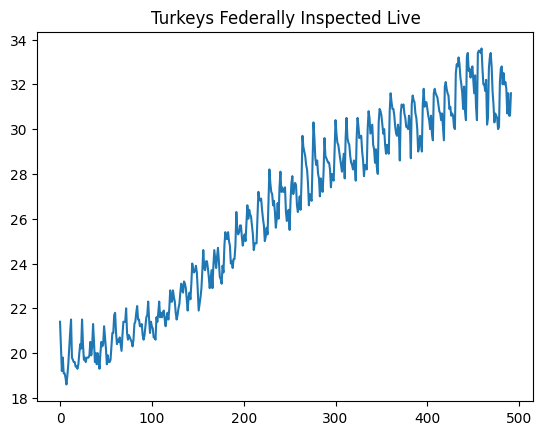

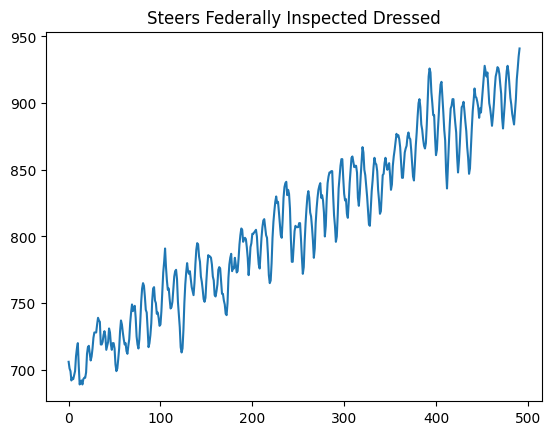

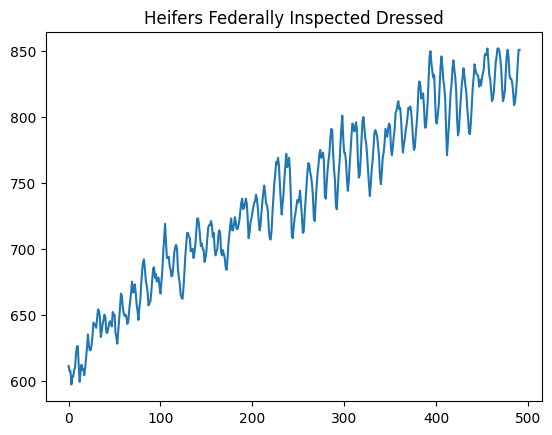

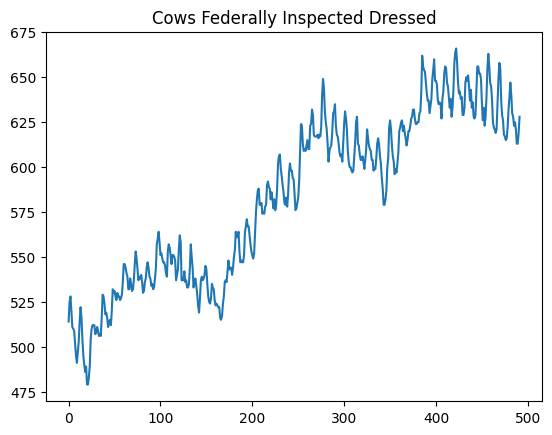

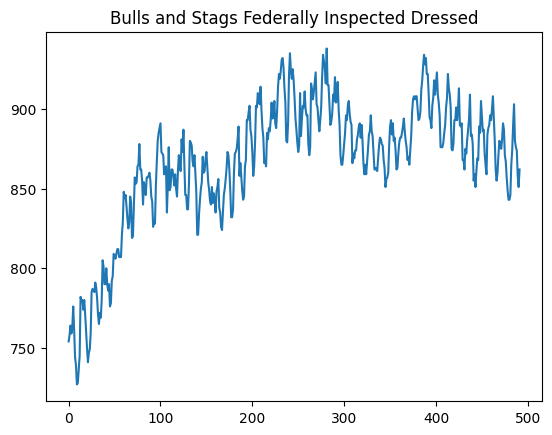

In [19]:
weights_dfs = {}

for animal in animals:
    for prod in produce_type:
        for wei in weight_type:
            selected_df = slaughter_weights[(slaughter_weights["Animal"] == animal) & (slaughter_weights["Commercial_Or_Federally_Inspected"] == prod) & (slaughter_weights["Live_Or_Dressed"] == wei)].reset_index().drop(["index"], axis=1)
            if len(selected_df) > 0:
                weights_dfs[animal + " " + prod + " " + wei] = selected_df
# Plotting the cleaned up graphs
for w in weights_dfs:
    plt.plot(range(len(weights_dfs[w])), np.flip(weights_dfs[w]["Weight"].values))
    plt.title(w)
    plt.show()

#### All commercial weights are live

In [26]:
for w in weights_dfs:
    if len(weights_dfs[w]) != 492:
        print("INCONSISTENT LENGTHS")

#### Data from Jan 1983 to Dec 2023

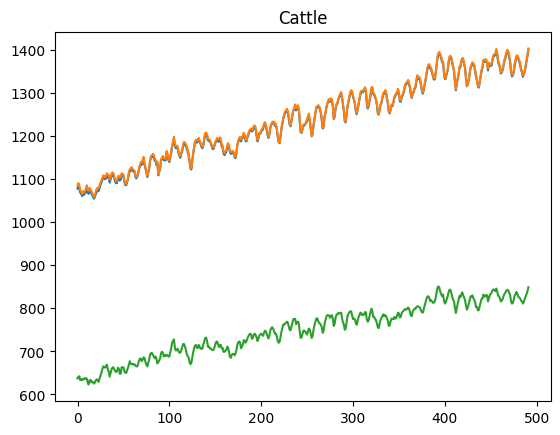

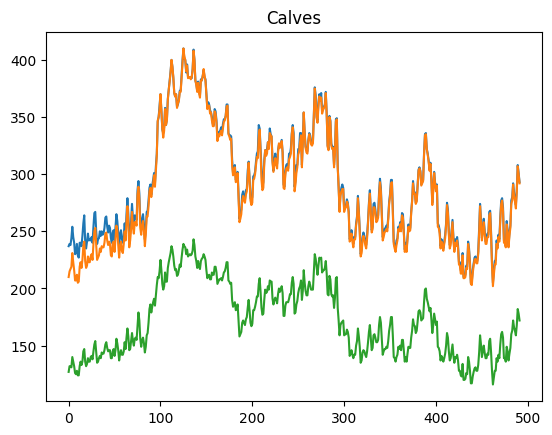

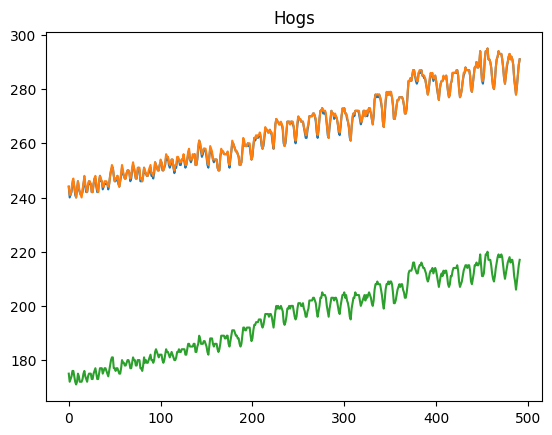

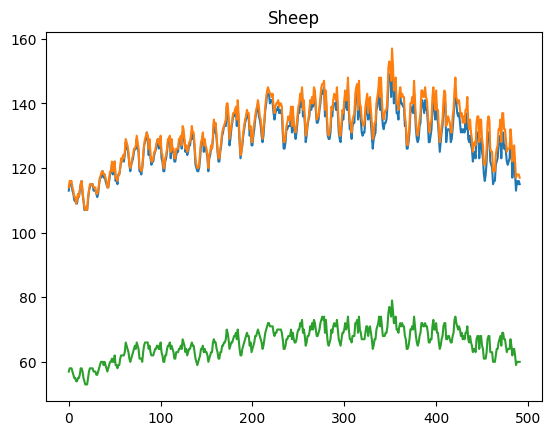

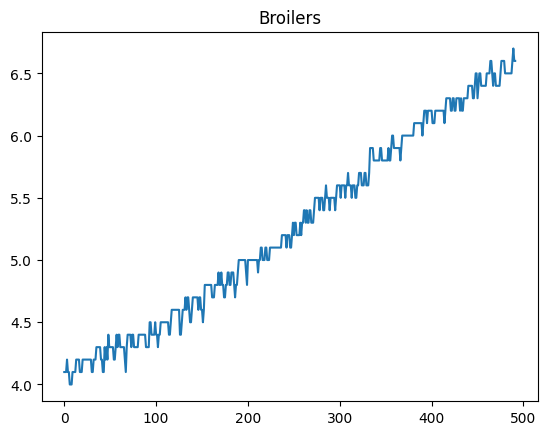

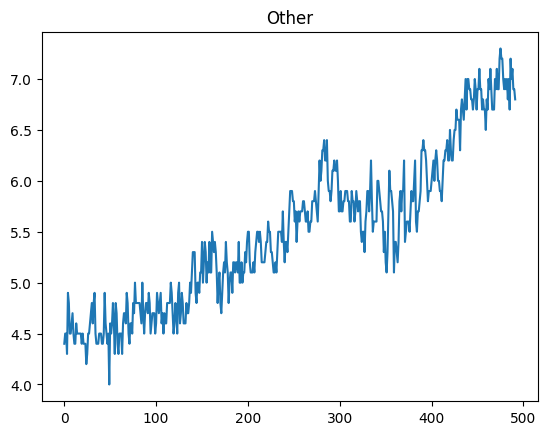

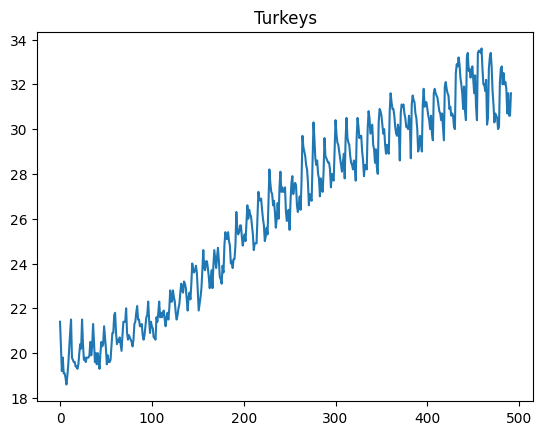

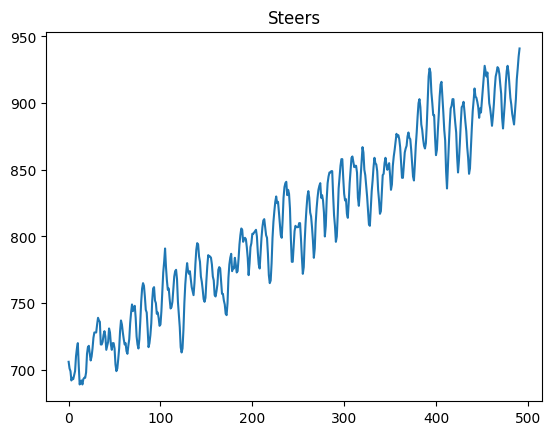

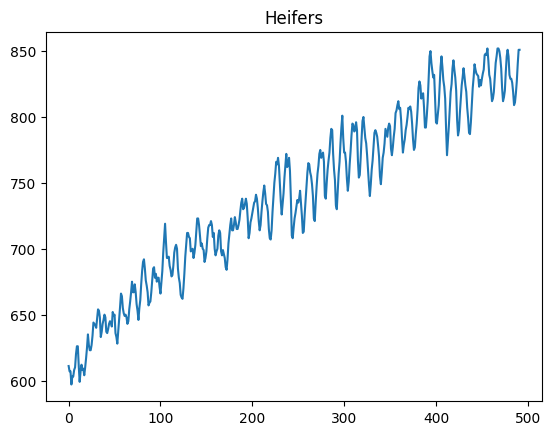

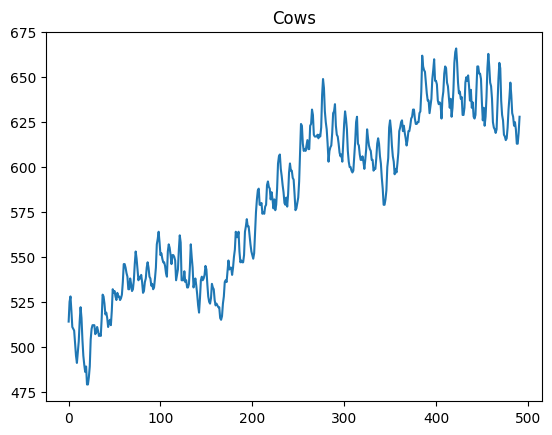

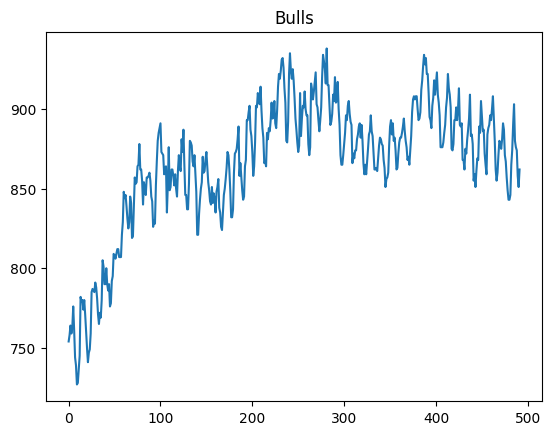

In [23]:
# Plotting all weights from same animal, they are highly correlated

cur_animal = None

for w in weights_dfs:
    if not cur_animal:
        plt.plot(range(len(weights_dfs[w])), np.flip(weights_dfs[w]["Weight"].values))
        cur_animal = w.split()[0]
    elif w.split()[0] == cur_animal:
        plt.plot(range(len(weights_dfs[w])), np.flip(weights_dfs[w]["Weight"].values))
    else:
        plt.title(cur_animal)
        plt.show()
        plt.plot(range(len(weights_dfs[w])), np.flip(weights_dfs[w]["Weight"].values))
        cur_animal = w.split()[0]
plt.title(cur_animal)
plt.show()

## -  Cold Storage

In [27]:
cold_storage

Date  Year  Month            Unit       Animal  Weight Type_Of_Meat
0     Dec-2023  2023     12  Million Pounds         Beef  457.41     Red Meat
1     Nov-2023  2023     11  Million Pounds         Beef  445.67     Red Meat
2     Oct-2023  2023     10  Million Pounds         Beef  420.85     Red Meat
3     Sep-2023  2023      9  Million Pounds         Beef  395.40     Red Meat
4     Aug-2023  2023      8  Million Pounds         Beef  410.46     Red Meat
...        ...   ...    ...             ...          ...     ...          ...
3931  May-1983  1983      5  Million Pounds  Frozen Eggs     NaN      Poultry
3932  Apr-1983  1983      4  Million Pounds  Frozen Eggs     NaN      Poultry
3933  Mar-1983  1983      3  Million Pounds  Frozen Eggs     NaN      Poultry
3934  Feb-1983  1983      2  Million Pounds  Frozen Eggs     NaN      Poultry
3935  Jan-1983  1983      1  Million Pounds  Frozen Eggs     NaN      Poultry

[3936 rows x 7 columns]

In [29]:
# For some reason, this is the only dataset where the column of interest is already a float
for x in cold_storage["Weight"].values:
    if type(x) != np.float64:
        print("NOT FLOAT")

In [30]:
animals = cold_storage["Animal"].unique()

animals

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broiler',
       'Other Chicken', 'Turkey', 'Frozen Eggs'], dtype=object)

In [36]:
for unit in cold_storage["Unit"].values:
    if unit != "Million Pounds":
        print("INCONSISTENT UNITS")

In [38]:
storage_dfs = {}

for animal in animals:
    storage_dfs[animal] = cold_storage[cold_storage["Animal"] == animal].reset_index().drop(["index"], axis=1)

In [41]:
for animal in storage_dfs:
    if len(storage_dfs[animal]) != 492:
        print("INCONSISTENT LENGTHS")

#### Data from Jan 1983 to Dec 2023

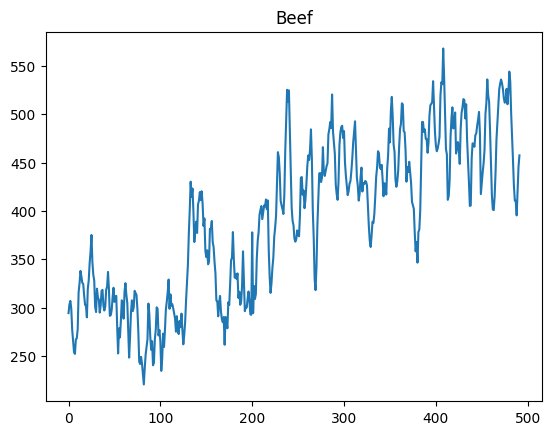

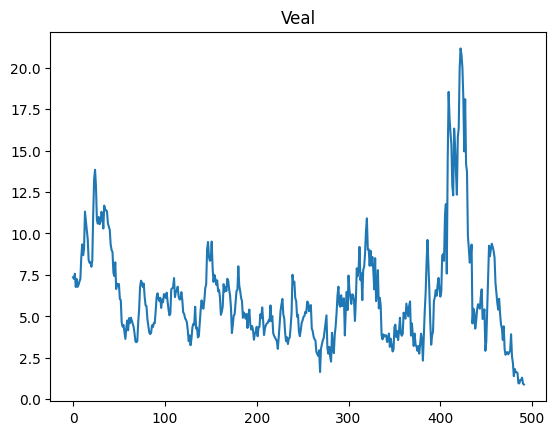

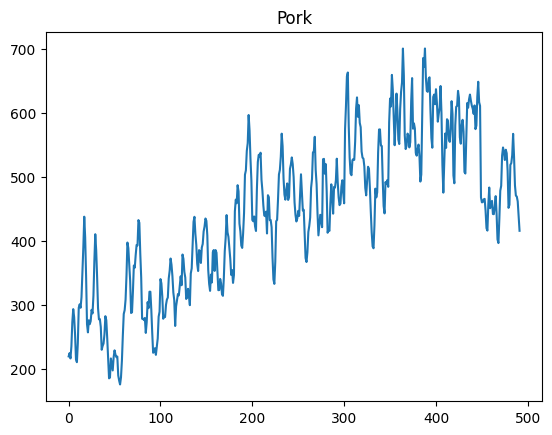

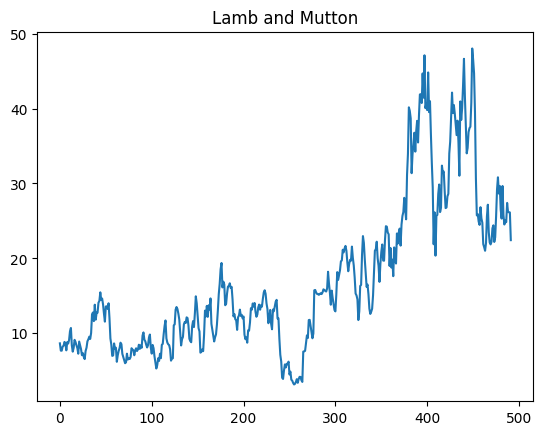

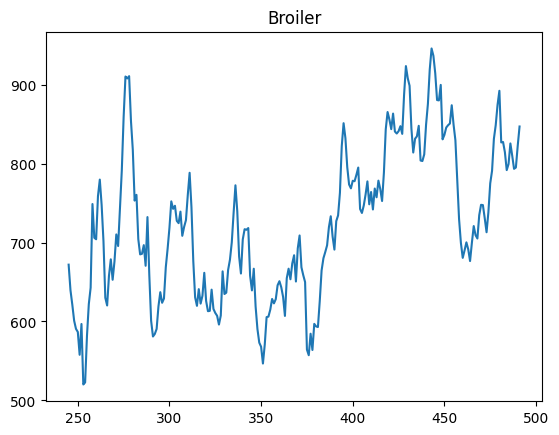

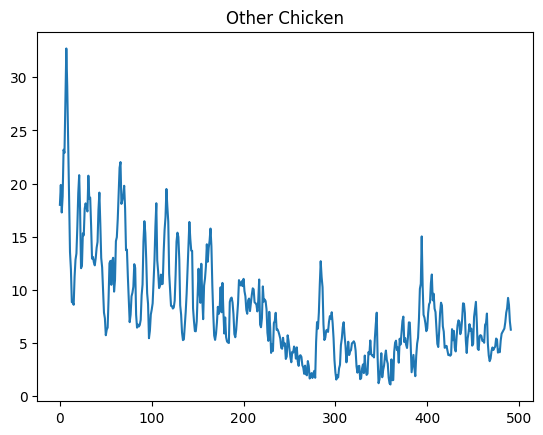

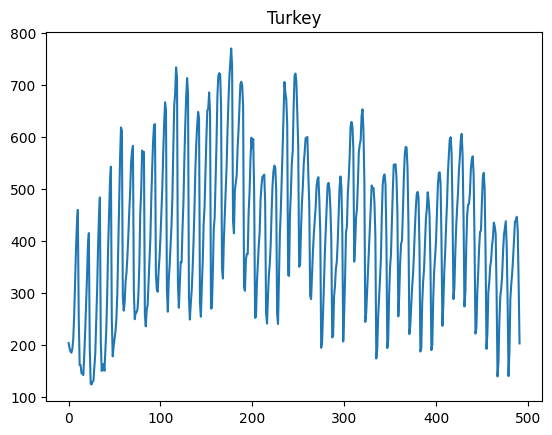

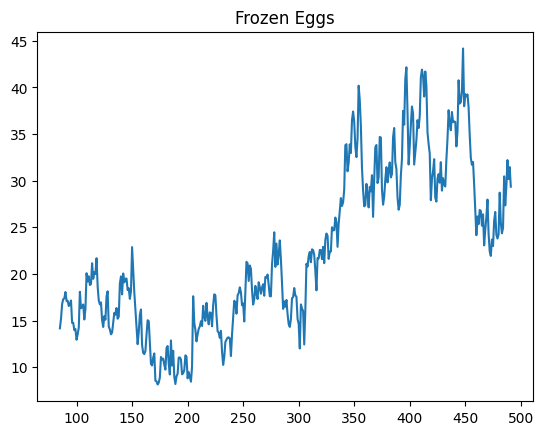

In [40]:
for animal in storage_dfs:
    plt.plot(range(len(storage_dfs[animal])), np.flip(storage_dfs[animal]["Weight"].values))
    plt.title(animal)
    plt.show()